# Problem Discription :

It is a sports case study where data for 2014 to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. It will help the team management to replace the team member.

Input features :
    
    R: Runs,

    AB: At Bats

    H: Hits

    2B: Doubles

    3B: Triples

    HR: Homeruns

    BB: Walks

    SO: Strikeouts

    SB: Stolen Bases

    RA: Runs Allowed

    ER: Earned Runs

    ERA: Earned Run Average (ERA)

    CG: Shutouts

    SV: Saves,

    SV: Complete Games

    E: Errors
    
Output features :

    W: Win

# Data Analysis

In [1]:

#importing pandas and numpy libraries
import pandas as pd
import numpy as np



In [5]:

#Reading the DataSet to work on the Data Project and adding in the dataframe
dfbase= pd.read_csv("baseball.csv")



In [6]:
# reading the number of columns from the data set baseball.
dfbase.columns



Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Observaion - There are total 16 features which will be used to develop a machine learning model 

Input features- Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output feature - Number of predicted wins (W)

In [7]:
# displaying the top columns of the baseball dataset.
dfbase.head()



,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [9]:
# displaying the bottom columns of the baseball dataset.
dfbase.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


# Data Cleaning

In [10]:
# checking the Null values present in the data set

dfbase.isnull().sum()



W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Observation - There are no Null values present in the data set.So there is no need of Cleaning the Data set .

In [ ]:
Checking the Data types

In [12]:
dfbase.dtypes



W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [14]:

dfbase['W'].unique()



array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [16]:


dfbase['W'].nunique()



24

In [17]:
dfbase.shape[0]

30

Checking if there are any blank records in the data set

In [19]:

dfbase.loc[dfbase['W'] == " "]



,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


In [ ]:
Observation - There are no Blank records in our Data set

Checking if there are any 0 value records in the data set

In [20]:

dfbase.loc[dfbase['W'] == 0]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


Observation - There are no 0 value records in our Data set

# Visualization of Data Frame

In [26]:


import seaborn as sns
import warnings
#filter.warnings ="ignore"



68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


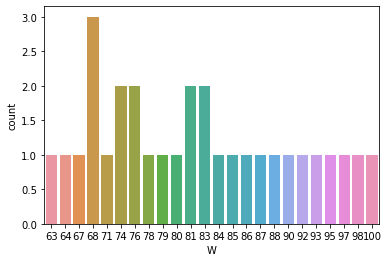

In [27]:
base=sns.countplot(x="W",data=dfbase)
print(dfbase["W"].value_counts())



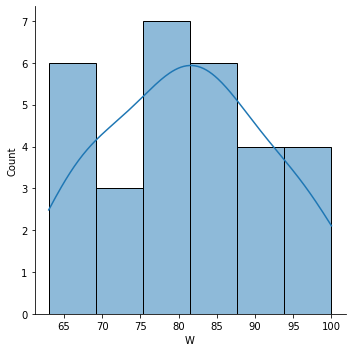

In [28]:


import seaborn as sns

sns.displot(dfbase["W"],kde =True)



Observation - The abolve displot shows that there is skewness in the output of the Dataset

In [29]:
#describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

dfbase.describe()



,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:>

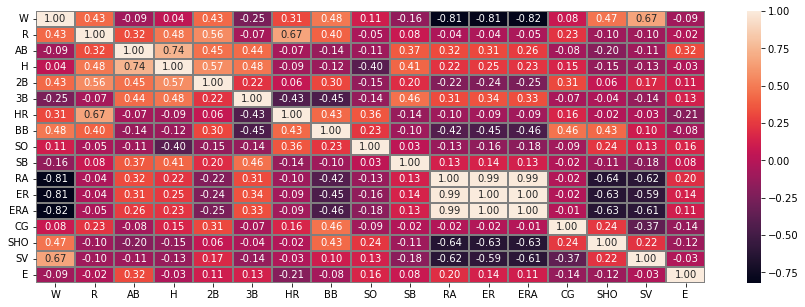

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize =(15,5))
sns.heatmap(dfbase.corr(), annot=True, linewidths=0.2,linecolor="grey",fmt='.2f')



In [33]:
dfbase.skew()


W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [46]:
dfbase.corr()['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

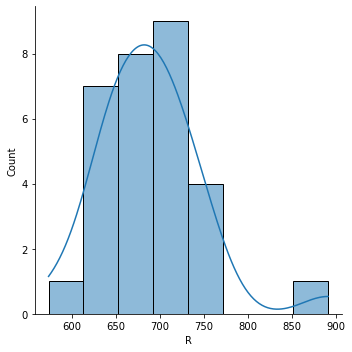

In [57]:
import seaborn as sns

sns.displot(dfbase['R'],kde =True)



<AxesSubplot:xlabel='R', ylabel='W'>

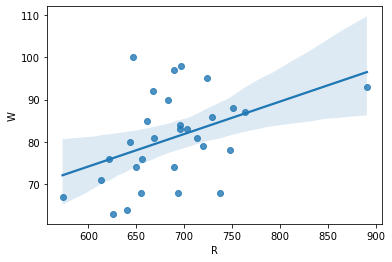

In [56]:
sns.regplot(x = 'R',y= 'W',data=dfbase)

<AxesSubplot:ylabel='R'>

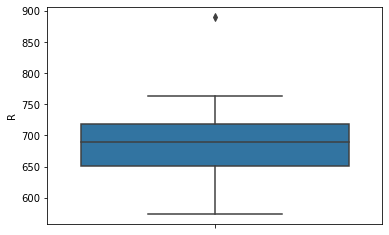

In [68]:
sns.boxplot(y='R',data=dfbase)

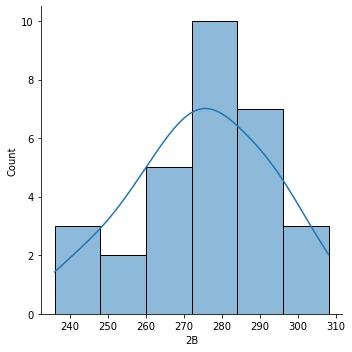

In [58]:
import seaborn as sns

sns.displot(dfbase['2B'],kde =True)

<AxesSubplot:xlabel='2B', ylabel='W'>

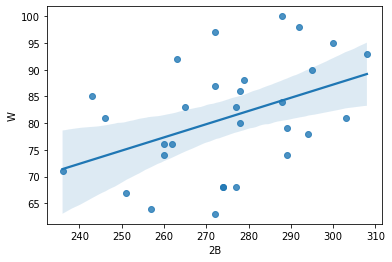

In [59]:
sns.regplot(x = '2B',y= 'W',data=dfbase)

<AxesSubplot:ylabel='2B'>

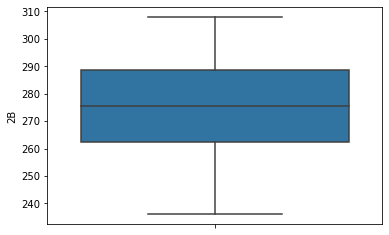

In [67]:
sns.boxplot(y='2B',data=dfbase)

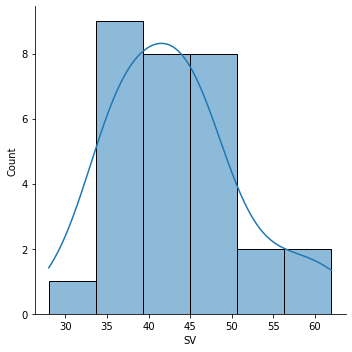

In [60]:
import seaborn as sns

sns.displot(dfbase['SV'],kde =True)

<AxesSubplot:xlabel='SV', ylabel='W'>

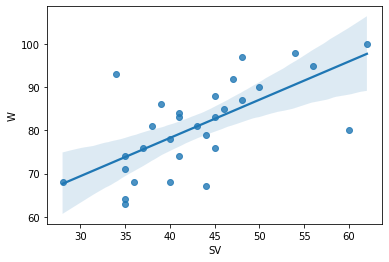

In [61]:
sns.regplot(x = 'SV',y= 'W',data=dfbase)

<AxesSubplot:ylabel='SV'>

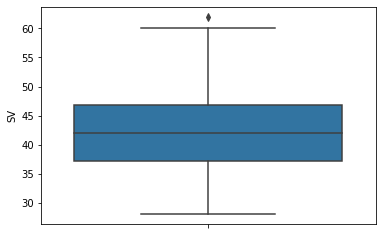

In [66]:
sns.boxplot(y='SV',data=dfbase)

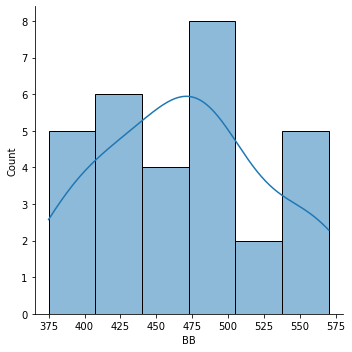

In [62]:
import seaborn as sns

sns.displot(dfbase['BB'],kde =True)

<AxesSubplot:xlabel='BB', ylabel='W'>

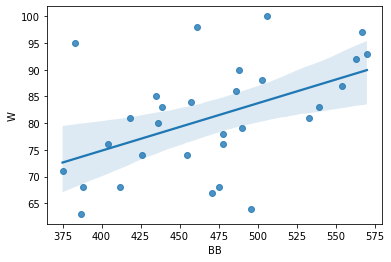

In [63]:
sns.regplot(x = 'BB',y= 'W',data=dfbase)

<AxesSubplot:ylabel='BB'>

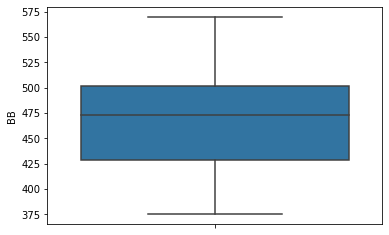

In [65]:
sns.boxplot(y='BB',data=dfbase)

Observation - From the abouve corelation data and the graph its clear that the Input features Run and Saves are highly corelated to the output feature Win.

Observation 2 - 
 Run and win are linearly correlated. And outliers are present between 850 and 900
 Other features like 2B , SV are highly corelated.

In [81]:
dfbase2=dfbase.drop(['RA','AB','3B','HR','BB','SO','ER','ERA','CG','E'],axis=1)

In [82]:


dfbase2.dtypes



W      int64
R      int64
H      int64
2B     int64
SB     int64
SHO    int64
SV     int64
dtype: object

In [83]:


from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(dfbase2))
threshold =3
np.where(z>3)



(array([5], dtype=int64), array([1], dtype=int64))

In [85]:


dfbase3 = dfbase2[(z<3).all(axis=1)]
dfbase3



,W,R,H,2B,SB,SHO,SV
0,95,724,1497,300,104,8,56
1,83,696,1349,277,70,12,45
2,81,669,1395,303,86,10,38
3,76,622,1381,260,68,9,37
4,74,689,1515,289,83,12,35
6,87,764,1397,272,63,4,48
7,81,713,1370,246,44,10,43
8,80,644,1383,278,87,12,60
9,78,748,1495,294,71,10,40
10,88,751,1419,279,101,9,45


In [87]:
dfbase3.shape

(29, 7)

# Applying Linear Regression approach

In [88]:


features = dfbase3.drop("R",axis= 1)
target = dfbase3["W"]



In [89]:
from sklearn.preprocessing import MinMaxScaler
mns =   MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
for i in range(0,100):
        features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
        lr.fit(features_train,target_train)
        pred_train = lr.predict(features_train)
        pred_test = lr.predict(features_test)
        print(f"At random state{i}  :- {r2_score(target_train,pred_train)}")
        print(f"At random state{i} : {r2_score(target_test,pred_test)}")
        print("\n")

At random state0  :- 1.0
At random state0 : 1.0


At random state1  :- 1.0
At random state1 : 1.0


At random state2  :- 1.0
At random state2 : 1.0


At random state3  :- 1.0
At random state3 : 1.0


At random state4  :- 1.0
At random state4 : 1.0


At random state5  :- 1.0
At random state5 : 1.0


At random state6  :- 1.0
At random state6 : 1.0


At random state7  :- 1.0
At random state7 : 1.0


At random state8  :- 1.0
At random state8 : 1.0


At random state9  :- 1.0
At random state9 : 1.0


At random state10  :- 1.0
At random state10 : 1.0


At random state11  :- 1.0
At random state11 : 1.0


At random state12  :- 1.0
At random state12 : 1.0


At random state13  :- 1.0
At random state13 : 1.0


At random state14  :- 1.0
At random state14 : 1.0


At random state15  :- 1.0
At random state15 : 1.0


At random state16  :- 1.0
At random state16 : 1.0


At random state17  :- 1.0
At random state17 : 1.0


At random state18  :- 1.0
At random state18 : 1.0


At random state19  :- 1.0
At ran

In [92]:


features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)



lr.fit(features_train,target_train)



pred_test=lr.predict(features_test)



print (r2_score(target_test,pred_test))



1.0


# Cross Validation of the model to overcome overfitting and underfitting

In [93]:
Train_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_train,pred_train)

from sklearn.model_selection import cross_val_score
for j in range (2,10):

    cv_score = cross_val_score(lr,features,target ,cv=j )
    cv_mean = cv_score.mean()
print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
print("\n")

At cross fold 9 the cv score is 1.0 and accuracy score for training is -0.41471667200911844 and accuracy for testing is -0.41471667200911844




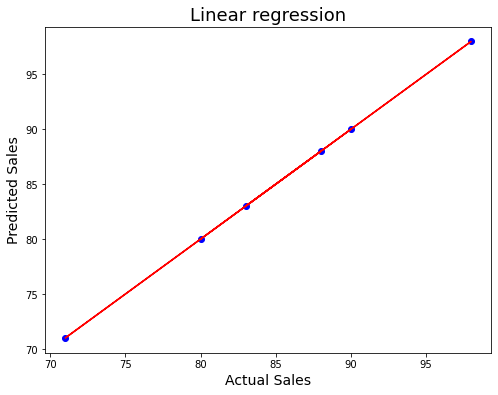

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize =(8,6))
plt.scatter(x=target_test,y=pred_test,color='b')
plt.plot(target_test,target_test,color='r')
plt.xlabel('Actual Sales' ,fontsize=14)
plt.ylabel('Predicted Sales' ,fontsize=14)
plt.title('Linear regression' ,fontsize=18)
plt.show()

# Regularization

In [96]:


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')



from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001,.001,.01,.1,1,10],
            'random_state':list(range(0,10))}
ls= Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [97]:


ls= Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls_score_training = ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)
ls_score_training*100



99.99112537626935

In [98]:


lss= r2_score(target_test,pred_ls)
lss*100



99.9872117335251

In [99]:
pred_ls = ls.predict (features_test)
cv_score = cross_val_score(ls,features,target ,cv=3)
cv_mean = cv_score.mean()
cv_mean *100

99.98432880714061

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print (clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [101]:


rf=RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(features_train,target_train)
rf.score (features_train,target_train)
pred_decission=rf.predict(features_test)

rfs = r2_score(target_test,pred_decission)
print('R2 score ',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc =rfscore.mean()
print ('cross validation score',rfc*100)



R2 score  90.13497663551404
cross validation score 90.76868220234383


Conclution - The R2 score for the model is 90.13 and Cross validation score is 90.76